<a href="https://colab.research.google.com/github/surajjeoor/Human_vs_machine_68/blob/main/Code_for_Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this code is designed by following the tutorial on hugging face website, for more details visit : https://huggingface.co/
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer,DataCollatorWithPadding
from datasets import load_dataset,Dataset
import pandas as pd

train_df=pd.read_excel("/content/Hind_Lang_sing_train.xlsx")
val_df=pd.read_excel("/content/Hind_sing_lang_test.xlsx")

In [ ]:
train_df.head()

,id,title,text,Generated By,labels
0,1,Maharana Pratap,"महाराणा प्रताप, भारतीय इतिहास के एक महान योद्ध...",Machine,0
1,2,Maharana Pratap,डॉ हुकमसिंह भाटी की पुस्तक सोनगरा सांचोरा चौहा...,Human,1
2,3,Maharana Pratap,महाराणा प्रताप का जन्म 9 मई 1540 को हुआ था। उन...,Machine,0
3,4,Maharana Pratap,"किंवदन्ती के अनुसार, प्रताप एक कठिन समय था जब ...",Human,1
4,5,Maharana Pratap,"अरावली शृंखला में एक अच्छी सेना के बिना भी, मह...",Human,1


In [ ]:
val_df.head()

,id,title,text,Generated By,labels
0,1,Maharana Pratap,"महाराणा प्रताप का प्रसिद्ध युद्ध, हाल्दीघाटी क...",Machine,0
1,2,Maharana Pratap,महाराणा प्रताप ने अपने जीवन में मुघल साम्राज्य...,Machine,0
2,3,Maharana Pratap,तीन घण्टे से अधिक समय तक चले भयंकर युद्ध के ब...,Human,1
3,4,Maharana Pratap,लड़ाई का स्थल राजस्थान के गोगुन्दा के पास हल्द...,Human,1
4,5,Maharana Pratap,ये मार्ग तंग घाटियों वाले उबड़-खाबड़ मार्ग के...,Human,1


In [ ]:
# val_df=val_df.drop('Prompts',axis=1)
train_df=train_df.drop('Prompts',axis=1)

In [ ]:
train_df.head()

,id,title,text,Generated By,labels
0,1,Maharana Pratap,"महाराणा प्रताप, भारतीय इतिहास के एक महान योद्ध...",Machine,0
1,2,Maharana Pratap,डॉ हुकमसिंह भाटी की पुस्तक सोनगरा सांचोरा चौहा...,Human,1
2,3,Maharana Pratap,महाराणा प्रताप का जन्म 9 मई 1540 को हुआ था। उन...,Machine,0
3,4,Maharana Pratap,"किंवदन्ती के अनुसार, प्रताप एक कठिन समय था जब ...",Human,1
4,5,Maharana Pratap,"अरावली शृंखला में एक अच्छी सेना के बिना भी, मह...",Human,1


In [ ]:
val_df.head()

,id,title,text,Generated By,labels
0,1,Maharana Pratap,"महाराणा प्रताप का प्रसिद्ध युद्ध, हाल्दीघाटी क...",Machine,0
1,2,Maharana Pratap,महाराणा प्रताप ने अपने जीवन में मुघल साम्राज्य...,Machine,0
2,3,Maharana Pratap,तीन घण्टे से अधिक समय तक चले भयंकर युद्ध के ब...,Human,1
3,4,Maharana Pratap,लड़ाई का स्थल राजस्थान के गोगुन्दा के पास हल्द...,Human,1
4,5,Maharana Pratap,ये मार्ग तंग घाटियों वाले उबड़-खाबड़ मार्ग के...,Human,1


In [ ]:
from datasets import Dataset
train_dataset=Dataset.from_pandas(train_df)
val_dataset=Dataset.from_pandas(val_df)

In [ ]:
#preprocessing data for languages from train
checkpoint="l3cube-pune/hindi-bert-v2"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

def tokenization(example):
  return tokenizer(example["text"],truncation=True)

tokenized_dataset_train=train_dataset.map(tokenization,batched=True)
tokenized_dataset_train=tokenized_dataset_train.remove_columns(["title","text","id","Generated By"])
tokenized_dataset_train.set_format("torch")

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_train=tokenized_dataset_train.rename_column("label","labels")

ValueError: ignored

In [ ]:
tokenized_dataset_val=val_dataset.map(tokenization,batched=True)
tokenized_dataset_val=tokenized_dataset_val.remove_columns(["title","text","id","Generated By"])
# tokenized_dataset_val=tokenized_dataset_val.rename_column("Label","labels")
tokenized_dataset_val.set_format("torch")

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_train

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 50
})

In [ ]:
tokenized_dataset_val

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 24
})

In [ ]:
data_collator=DataCollatorWithPadding(tokenizer)

In [ ]:
from torch.utils.data import DataLoader

train_dl=DataLoader(dataset=tokenized_dataset_train,batch_size=8,shuffle=True,collate_fn=data_collator)
val_dl=DataLoader(dataset=tokenized_dataset_val,batch_size=8,collate_fn=data_collator)

In [ ]:
for batch in train_dl:
  break
print({k:v.shape for k,v in batch.items()})

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([8]), 'input_ids': torch.Size([8, 90]), 'token_type_ids': torch.Size([8, 90]), 'attention_mask': torch.Size([8, 90])}


In [ ]:
from transformers import AutoModelForSequenceClassification

model=AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/hindi-bert-v2 and are newly initialized: ['classifier.weight', 'classifier.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
outputs=model(**batch)

In [ ]:
print(outputs.loss,outputs.logits)

tensor(0.6928, grad_fn=<NllLossBackward0>) tensor([[-0.0030,  0.0013],
        [-0.0031,  0.0019],
        [-0.0029,  0.0012],
        [-0.0031,  0.0014],
        [-0.0020,  0.0014],
        [-0.0020,  0.0010],
        [-0.0013,  0.0008],
        [-0.0023,  0.0019]], grad_fn=<AddmmBackward0>)


In [ ]:
!pip install torch

In [ ]:
from transformers import AdamW
import torch
# import torch_xla
# import torch_xla.core.xla_model as xm

In [ ]:
optim=AdamW(params=model.parameters(),lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#a learning scheduler will update the optimizers learning rate at each step
from transformers import get_scheduler
num_epochs=2
num_training_step=num_epochs*(len(train_dl))
lr_scheduler=get_scheduler("linear",optimizer=optim,num_warmup_steps=0,num_training_steps=num_training_step)

In [ ]:
#real model training starts
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
print(device)

cuda


In [ ]:
loss_list=[]
count_list=[]
count=0

In [ ]:
from tqdm.auto import tqdm
# accel=Accelerator()
# model,optimizer,train_dataloader=accel.prepare(model,optim,train_dl)
pro_bar=tqdm(range(num_training_step))
model.train()
for epo in range(num_epochs):
  for batch in train_dl:
    batch={k:v.to(device) for k,v in batch.items()}
    output_1=model(**batch)
    loss=output_1.loss
    loss1=loss.cpu()
    loss_list.append(float(loss1))
    count=count+1
    count_list.append(count)
    # accel.backward(loss)
    loss.backward()

    optim.step()
    lr_scheduler.step()
    optim.zero_grad()
    pro_bar.update(1)

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

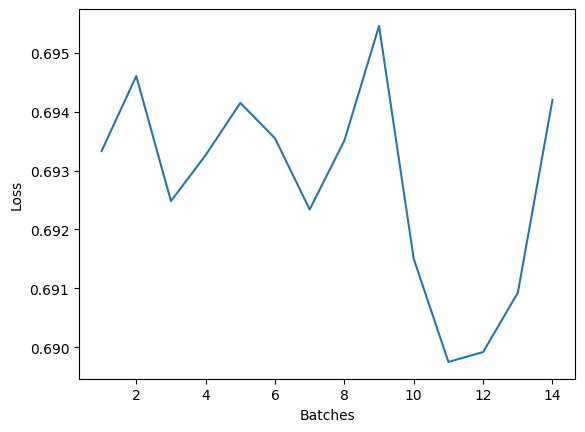

In [ ]:
plt.xlabel("Batches")
plt.ylabel("Loss")

plt.plot(count_list,loss_list)
plt.show()

In [ ]:
!pip install evaluate

In [ ]:
import evaluate

In [ ]:
clf_metrics=evaluate.combine(["accuracy","f1","precision","recall"])

In [ ]:
val_loss_set=[]
val_count_set=[]
val_count=0

In [ ]:
from datasets import load_metric
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
# accuracy_metric=load_metric('accuracy')
# precision_metric=load_metric('precision')
# recall_metric=load_metric('recall')
# f1_metric=load_metric('f1')
# metric=load_metric("glue","mrpc")
cm=np.zeros((2,2),dtype=np.int)
model.eval()
for batch in val_dl:
  batch={k:v.to(device) for k,v in batch.items()}
  with torch.no_grad():
    outputs=model(**batch)

  logits=outputs.logits
  val_loss=outputs.loss
  val_loss_1=val_loss.cpu()
  val_loss_set.append(float(val_loss_1))
  val_count=val_count+1
  val_count_set.append(val_count)
  predictions=torch.argmax(logits,dim=-1)
  # print(predictions)
  # print(batch['labels'])
  # metric.add_batch(predictions=predictions,references=batch["labels"])
  clf_metrics.add_batch(predictions=predictions,references=batch["labels"])
  ref=batch["labels"]
  ref_np=ref.cpu().numpy()
  pred=predictions.cpu().numpy()
  cm+=confusion_matrix(ref_np,pred)
  # accuracy_metric.add_batch(predictions=predictions,references=batch["labels"])
  # precision=precision_metric.compute(predictions=predictions,references=batch["labels"])
  # recall=recall_metric.compute(predictions=predictions,references=batch["labels"])
  # f1_score=f1_metric.compute(predictions=predictions,references=batch["labels"])

# accuracy=accuracy_metric.compute()
# precision=precision_metric.compute()
# recall=recall_metric.compute()
# f1_score=f1_metric.compute()

display1=ConfusionMatrixDisplay(confusion_matrix=cm)
clf_metrics.compute()

<ipython-input-117-0c65fa5fcd07>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm=np.zeros((2,2),dtype=np.int)


{'accuracy': 0.5833333333333334,
 'f1': 0.2857142857142857,
 'precision': 1.0,
 'recall': 0.16666666666666666}

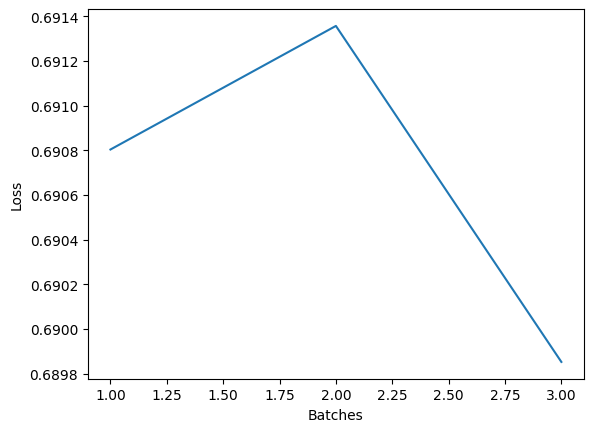

In [ ]:
plt.xlabel("Batches")
plt.ylabel("Loss")
plt.plot(val_count_set,val_loss_set)
plt.show()

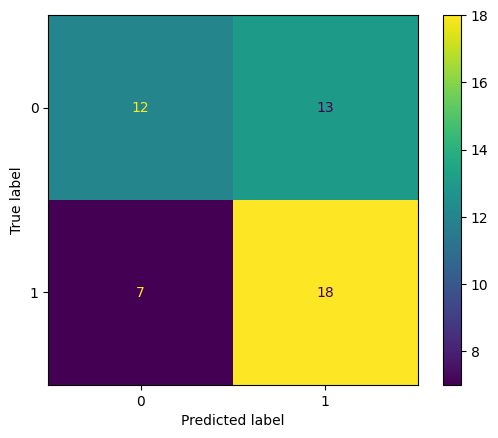

In [ ]:
display1.plot()

In [ ]:
!pip install --upgrade shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
model_cpu=model.cpu()

In [ ]:
pipe=pipeline(task="text-classification",model=model_cpu,tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
text3_machine=["""जे. रॉबर्ट ऑपेनहाइमर, जन्मदिन अप्रैल 22, 1904 को हुए, एक अमेरिकी सिद्धांत भौतिकविद थे और द्वितीय विश्व युद्ध के दौरान परमाणु बम के विकास में महत्वपूर्ण योगदान देने वाले व्यक्तियों में से एक थे। उन्हें आम तौर पर "परमाणु बम के पिता" के रूप में संबोधित किया जाता है उनके मैनहटन प्रोजेक्ट में किए गए महत्वपूर्ण योगदान के लिए, जिससे अंततः पहले परमाणु बमों के सफल निर्माण का संदर्भन बना।"""]

In [ ]:
import shap

In [ ]:
explainer=shap.Explainer(pipe)
shap_values=explainer(text3_machine)

  0%|          | 0/498 [00:00<?, ?it/s]


Partition explainer: 2it [03:24, 204.67s/it]              


In [ ]:
score_and_visualize(text3_machine,shap_values)

the predicted model is gonna be:[{'label': 'LABEL_0', 'score': 0.673815131187439}]


In [ ]:
def score_and_visualize(textu,shap_values):
  prediction=pipe(textu)
  print(f"the predicted model is gonna be:{prediction}")
  shap.plots.text(shap_values)

In [ ]:
shap_values_2=explainer(text3_machine)

  0%|          | 0/498 [00:00<?, ?it/s]


Partition explainer: 2it [06:29, 389.86s/it]              


In [ ]:
text1_human=[""" जूलियस रॉबर्ट ओपेनहाइमर (Julius Robert Oppenheimer) (२२ अप्रैल १९०४ - १८ फ़रवरी १९६७) एक सैद्धान्तिक भौतिकविद् एवं अमेरिका के कैलिफोर्निया विश्वविद्यालय (बर्कली) में भौतिकी के प्राध्यापक थे जो परमाणु बम के जनक के रूप में अधिक विख्यात हैं।[2] वे द्वितीय विश्वयुद्ध के समय परमाणु बम के निर्माण के लिये आरम्भ की गयी मैनहट्टन परियोजना के वैज्ञानिक निदेशक थे। न्यू मैक्सिको में जब ट्रिनिटी टेस्ट हुआ और इनकी टीम ने पहला परमाणु परीक्षण किया तो उनके मुंह से भगवद गीता का एक श्लोक निकल पड़ा।"""]

In [ ]:
shap_values_1=explainer(text1_human)

  0%|          | 0/498 [00:00<?, ?it/s]


Partition explainer: 2it [03:35, 215.40s/it]              


In [ ]:
score_and_visualize(text1_human,shap_values_1)

the predicted model is gonna be:[{'label': 'LABEL_1', 'score': 0.6744785308837891}]
